In [128]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.decomposition import PCA
import datetime

%matplotlib inline

In [97]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [2]:
all_df = pd.read_csv('data/folk_song_lyrics.csv').drop('Unnamed: 0', axis=1)

In [4]:
all_df['album_id'].nunique()

578

In [5]:
all_df.loc[all_df['album'] == 'In the Aeroplane Over the Sea']

,song_id,album_id,artist,album,album_href,song,track_num,lyrics,song_href,is_folk,is_folk_rock,is_indie_folk,is_album_art,is_instrumental,is_alt_country
11,11,1,Neutral Milk Hotel,In the Aeroplane Over the Sea,https://genius.com/albums/Neutral-Milk-Hotel/I...,The King of Carrot Flowers Pt. One,1.0,"[Verse 1] n When you were young, you were the ...",https://genius.com/Neutral-milk-hotel-the-king...,1.0,0.0,1.0,False,0,0
12,12,1,Neutral Milk Hotel,In the Aeroplane Over the Sea,https://genius.com/albums/Neutral-Milk-Hotel/I...,The King of Carrot Flowers Pts. Two & Three,2.0,"Part Two n [Verse 1] n I love you, Jesus Chris...",https://genius.com/Neutral-milk-hotel-the-king...,1.0,0.0,1.0,False,0,0
13,13,1,Neutral Milk Hotel,In the Aeroplane Over the Sea,https://genius.com/albums/Neutral-Milk-Hotel/I...,In the Aeroplane Over the Sea,3.0,[Verse 1] n What a beautiful face n I have fou...,https://genius.com/Neutral-milk-hotel-in-the-a...,1.0,0.0,1.0,False,0,0
14,14,1,Neutral Milk Hotel,In the Aeroplane Over the Sea,https://genius.com/albums/Neutral-Milk-Hotel/I...,Two-Headed Boy,4.0,[Verse 1] n Two headed boy n All floating in g...,https://genius.com/Neutral-milk-hotel-two-head...,1.0,0.0,1.0,False,0,0
15,15,1,Neutral Milk Hotel,In the Aeroplane Over the Sea,https://genius.com/albums/Neutral-Milk-Hotel/I...,The Fool,5.0,[Instrumental],https://genius.com/Neutral-milk-hotel-the-fool...,1.0,0.0,1.0,False,1,0
16,16,1,Neutral Milk Hotel,In the Aeroplane Over the Sea,https://genius.com/albums/Neutral-Milk-Hotel/I...,"Holland, 1945",6.0,[Verse 1] n The only girl I've ever loved n Wa...,https://genius.com/Neutral-milk-hotel-holland-...,1.0,0.0,1.0,False,0,0
17,17,1,Neutral Milk Hotel,In the Aeroplane Over the Sea,https://genius.com/albums/Neutral-Milk-Hotel/I...,Communist Daughter,7.0,"[Intro] n One n [Verse] n Sweet communist, the...",https://genius.com/Neutral-milk-hotel-communis...,1.0,0.0,1.0,False,0,0
18,18,1,Neutral Milk Hotel,In the Aeroplane Over the Sea,https://genius.com/albums/Neutral-Milk-Hotel/I...,Oh Comely,8.0,"[Verse 1] n Oh comely, I will be with you when...",https://genius.com/Neutral-milk-hotel-oh-comel...,1.0,0.0,1.0,False,0,0
19,19,1,Neutral Milk Hotel,In the Aeroplane Over the Sea,https://genius.com/albums/Neutral-Milk-Hotel/I...,Ghost,9.0,"[Verse 1] n Ghost, ghost, I know you live with...",https://genius.com/Neutral-milk-hotel-ghost-ly...,1.0,0.0,1.0,False,0,0
20,20,1,Neutral Milk Hotel,In the Aeroplane Over the Sea,https://genius.com/albums/Neutral-Milk-Hotel/I...,Untitled,10.0,[Instrumental],https://genius.com/Neutral-milk-hotel-untitled...,1.0,0.0,1.0,False,1,0


In [25]:
df = all_df[['lyrics', 'album_id', 'is_indie_folk']]

In [29]:
df['is_indie_folk'].sum()

1776.0

In [31]:
list_of_album_lyric_lines = list(zip(df['lyrics'], df['album_id'], df['is_indie_folk']))

In [33]:
list_of_album_lyric_lines[0]

("[hook] n I've been to a minor place n And I can say I like its face n If I am gone and with no trace n I will be in a minor place n Well I put the shoes in line n Separate the women mine n As we do what we do fine n So victorious, so benign n [hook] n Only take the weather warm n And the job that does me harm n The scars of last year's storm n Rest like maggots on my arm n [hook] n Thank you man if for the thought n That all my loving can be bought n Was wisely in your gullet caught n Before my loyalty you sought n [hook] n O it's not a desert nor a web n Nor a tomb where I lay dead n Minor in a sound alone n Yes a clear commanding tone n Singing from my little point n And aching in my every joint n I thank the world it will anoint me n If I show it how I hold it",
 0,
 1.0)

In [34]:
lines = []
albums = []
is_indie_folk = []

for lyric, album, is_ in list_of_album_lyric_lines:
    x = (re.sub('\[.{1,10}\] n', '', lyric).split(' n '))
    for line in x:
        lines.append(line)
        albums.append(album)
        is_indie_folk.append(is_)

In [35]:
len(lines)

160657

In [36]:
len(albums)

160657

In [37]:
len(is_indie_folk)

160657

In [38]:
lines_df = pd.concat((pd.DataFrame(lines, columns=['lyrics']), pd.DataFrame(albums, columns=['album_id'])), axis=1)

In [42]:
lines_df = pd.concat((lines_df, pd.DataFrame(is_indie_folk, columns=['is_indie_folk'])), axis=1)

(array([ 19.,  23.,  15.,  20.,  17.,  24.,  22.,  36.,  40.,  47.,  51.,
         38.,  28.,  42.,  29.,  20.,  28.,  16.,   7.,  11.,   8.,   7.,
          7.,   2.,   5.,   4.,   1.,   2.,   3.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.]),
 array([    0.,    25.,    50.,    75.,   100.,   125.,   150.,   175.,
          200.,   225.,   250.,   275.,   300.,   325.,   350.,   375.,
          400.,   425.,   450.,   475.,   500.,   525.,   550.,   575.,
          600.,   625.,   650.,   675.,   700.,   725.,   750.,   775.,
          800.,   825.,   850.,   875.,   900.,   925.,   950.,   975.,
         1000.,  1025.,  1050.,  1075.,  1100.,  1125.,  1150.,  1175.,
         1200.,  1225.,  1250.,  1275.,  1300.,  1325.,  1350.,  1375.,
         1400.,  1425.,  1450.,  1475.,  1500.]),
 <a list of 60 Patch objects>)

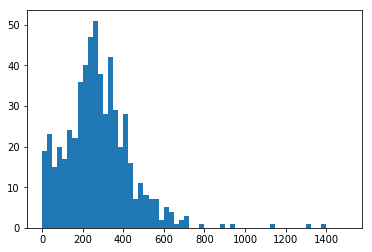

In [12]:
plt.hist(lines_df['album_id'].value_counts(), bins=np.linspace(0, 1500, 61))

In [43]:
q = lines_df.groupby('album_id')[['lyrics']].count()

In [44]:
q.shape

(578, 1)

In [45]:
q = q.loc[q['lyrics'] >= 25]

In [46]:
def album_trimmer(cell):
    if cell in q.index.values:
        return 1
    else:
        return 0

In [47]:
lines_df['has_enough'] = lines_df['album_id'].apply(album_trimmer)

In [48]:
lines_df = lines_df.loc[lines_df['has_enough'] == 1]

In [50]:
X = lines_df['lyrics']
y = lines_df['is_indie_folk']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2018)

In [67]:
X_train.values

array(['All the time I buy, now I see the other side',
       'Swallows fall in a wave',
       "So I (so I) don't feel (don't feel) so torn", ...,
       'And do I have to do just one', 'And your fingerlings from the air',
       'Not the early one'], dtype=object)

In [68]:
y_train.values

array([ 0.,  1.,  0., ...,  0.,  1.,  0.])

In [69]:
pipe = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 4))),
    ('mnb', MultinomialNB())
])

In [70]:
pipe.fit(X_train.values, y_train.values)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [71]:
predictions =  pipe.predict(X_test.values)

In [85]:
probabilities = pipe.predict_proba(X_test)

In [76]:
pd.DataFrame(confusion_matrix(y_test, predictions), columns=['true_neg', 'true_pos'], index=['true_neg', 'true_pos'], )

,true_neg,true_pos
true_neg,21880,634
true_pos,6022,3535


In [73]:
accuracy_score(y_test, predictions)

0.79246047831374133

In [80]:
len(y_test)

32071

In [81]:
len(probabilities)

32071

In [93]:
actual_vs_proba = pd.DataFrame(y_test)

In [97]:
actual_vs_proba = actual_vs_proba.reset_index()

In [99]:
actual_vs_proba = pd.concat((actual_vs_proba, pd.DataFrame(probabilities)), axis=1)

In [102]:
actual_vs_proba.head()

,index,is_indie_folk,0,1
0,147551,1.0,0.000017,0.999983
1,68625,0.0,0.999887,0.000113
2,79133,1.0,0.991464,0.008536
3,103661,0.0,0.991169,0.008831
4,151634,1.0,0.888306,0.111694


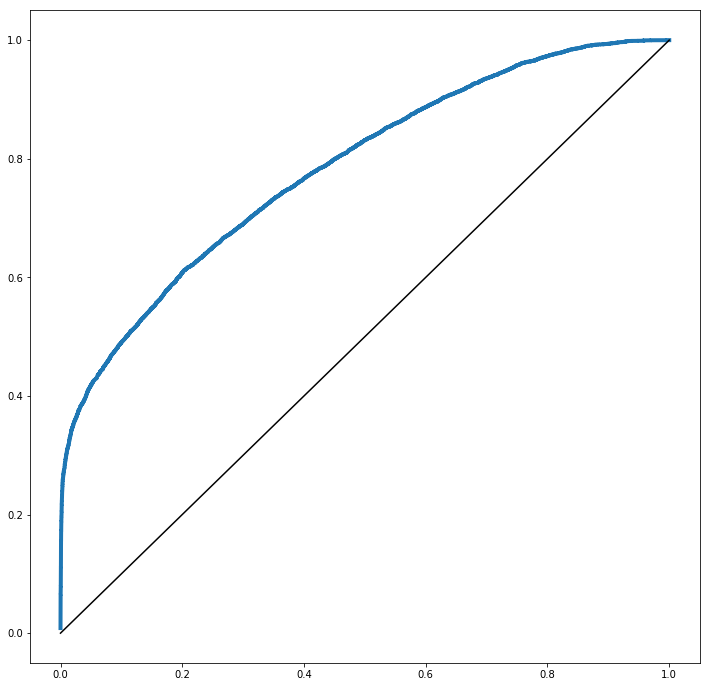

In [109]:
fpr, tpr, threshold = roc_curve(actual_vs_proba['is_indie_folk'], actual_vs_proba[1])
area = auc(fpr, tpr)

plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr, label=f'auc: {area}', linewidth=4)
plt.plot((0, 1), (0, 1), c='k')

In [111]:
lyrics = all_df['lyrics']
label = all_df['is_folk_rock']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(lyrics, label, stratify=label, random_state=2018)

In [122]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [123]:
song_predictions = pipe.predict(X_test)

In [124]:
confusion_matrix(y_test, song_predictions)

array([[1216,    2],
       [ 253,   10]])

In [116]:
nmh_df = lines_df.loc[lines_df['album_id'] ==1]

In [124]:
nmh_df.head()

,lyrics,album_id,has_enough
365,"When you were young, you were the king of car...",1,1
366,And how you built a tower tumbling through the...,1,1
367,In holy rattlesnakes that fell all around your...,1,1
368,And your mom would stick a fork right into dad...,1,1
369,And dad would throw the garbage all across the...,1,1


In [125]:
nmh_X = nmh_df['lyrics']
nmh_y = nmh_df['album_id']

In [152]:
len(nmh_X)

297

In [130]:
len(nmh_X)

297

In [200]:
nmh_predictions = pipe.predict(nmh_X)

In [201]:
nmh_probabilities = pipe.predict_proba(nmh_X)

In [202]:
len(nmh_predictions)

297

In [203]:
len(nmh_probabilities)

297

In [204]:
final_df = pd.concat((pd.DataFrame(nmh_predictions, columns=['predicted']), pd.DataFrame(nmh_probabilities)), axis=1)

In [205]:
final_df = final_df[['predicted', 1]]

In [206]:
final_df['lyrics'] = nmh_X.values

In [207]:
final_df

,predicted,1,lyrics
0,574,8.031273e-09,"When you were young, you were the king of car..."
1,1,9.998739e-01,And how you built a tower tumbling through the...
2,66,1.627747e-03,In holy rattlesnakes that fell all around your...
3,65,3.427082e-04,And your mom would stick a fork right into dad...
4,574,6.056565e-07,And dad would throw the garbage all across the...
5,1,9.999175e-01,As we would lay and learn what each other's bo...
6,574,5.061046e-09,"And this is the room one afternoon, I knew I ..."
7,574,4.092860e-04,And from above you how I sank into your soul
8,574,3.095267e-06,Into that secret place where no one dares to go
9,574,2.177760e-05,And your mom would drink until she was no long...


In [208]:
pd.DataFrame(final_df['predicted'].value_counts())

,predicted
574,147
1,76
66,28
20,11
65,8
19,4
723,4
59,3
623,2
457,2


In [190]:
mis_class = mis_class.reset_index()

In [165]:
import pickle
all_folk_albums_dict = pickle.load(open('all_folk_albums.pkl', 'rb'))

In [187]:
for album_id in final_df['predicted'].unique():
    print(album_id, all_folk_albums_dict[album_id]['artist'], all_folk_albums_dict[album_id]['album'])

574 Sun Kil Moon Common As Light and Love Are Red Valleys of Blood
1 Neutral Milk Hotel In the Aeroplane Over the Sea
65 Various Artists Dark Was The Night
20 Joanna Newsom Have One on Me
463 Bright Eyes Digital Ash in a Digital Urn
303 Bright Eyes Lifted or The Story Is in the Soil, Keep Your Ear to the Ground
723 The Head and The Heart The Head and The Heart
193 Angels of Light We Are Him
66 Bob Dylan The Bootleg Series Vol. 8: Tell Tale Signs
776 Emmy the Great First Love
39 Beth Orton Central Reservation
59 Elvis Costello King of America
679 Bright Eyes Fevers and Mirrors
115 Bob Dylan Modern Times
25 Bob Dylan The Bootleg Series Vol. 6: Bob Dylan Live 1964
21 Sufjan Stevens Illinois
120 Josh Ritter Hello Starling
196 American Music Club Love Songs for Patriots
460 Beth Orton Comfort of Strangers
365 The Avett Brothers Emotionalism
755 Withered Hand New Gods
756 Lucy Rose Like I Used To


In [231]:
all_lyrics = all_df['lyrics']

all_cv = CountVectorizer(ngram_range=(1, 4))

In [233]:
cv_lyrics = all_cv.fit_transform(all_lyrics)

In [235]:
lyrics_mat = cv_lyrics.toarray()

In [234]:
pca = PCA(n_components=10)

In [ ]:
x = pca.fit(lyrics_mat)

In [16]:
import nltk

In [6]:
inthe_aeroplane_over_the_sea_lyrics = all_df.loc[all_df['album'] == 'In the Aeroplane Over the Sea']['lyrics'].values

In [10]:
in_the_aero_plane_over_the_sea = pd.DataFrame(inthe_aeroplane_over_the_sea_lyrics, columns=['lyrics'])

In [12]:
list_of_lines = []

for lyric in in_the_aero_plane_over_the_sea['lyrics']:
    lines = lyric.split(' n ')
    for line in lines:
        list_of_lines.append(line)

In [19]:
in_the_aeroplane_over_the_sea_lines = pd.DataFrame(list_of_lines, columns=['lines'])

In [20]:
in_the_aeroplane_over_the_sea_lines.head()

,lines
0,[Verse 1]
1,"When you were young, you were the king of carr..."
2,And how you built a tower tumbling through the...
3,In holy rattlesnakes that fell all around your...
4,And your mom would stick a fork right into dad...


In [47]:
import itertools

In [62]:
sentences = []
for line in in_the_aeroplane_over_the_sea_lines['lines']:
  
    sentence = nltk.word_tokenize('sentence_start ' + line + ' sentence_end')
    sentences.append(sentence)

In [66]:
word_freq = nltk.FreqDist(itertools.chain(*sentences))

In [67]:
vocab = word_freq.most_common(600)

In [74]:
index_to_word = [x[0] for x in vocab]
index_to_word.append('UNKNOWN_TOKEN')

In [76]:
word_to_index = dict([(w, i) for i, w in enumerate(index_to_word)])

In [79]:
for i, sent in enumerate(sentences):
    sentences[i] = [w if w in word_to_index else 'UNKNOWN_TOKEN' for w in sent]

In [82]:
X_train = np.asarray([[word_to_index[w] for w in sent[:-1]] for sent in sentences])
y_train = np.asarray([[word_to_index[w] for w in sent[1:]] for sent in sentences])

In [136]:
# from http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-2-implementing-a-language-model-rnn-with-python-numpy-and-theano/

class RNNNumpy:

    def __init__(self, word_dim, hidden_dim=100, bptt_truncate=4):
            # Assign instance variables
            self.word_dim = word_dim
            self.hidden_dim = hidden_dim
            self.bptt_truncate = bptt_truncate
            # Randomly initialize the network parameters
            self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
            self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
            self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))

    def forward_propagation(self, x):
        # The total number of time steps
        T = len(x)
        # During forward propagation we save all hidden states in s because need them later.
        # We add one additional element for the initial hidden, which we set to 0
        s = np.zeros((T + 1, self.hidden_dim))
        s[-1] = np.zeros(self.hidden_dim)
        # The outputs at each time step. Again, we save them for later.
        o = np.zeros((T, self.word_dim))
        # For each time step...
        for t in np.arange(T):
            # Note that we are indxing U by x[t]. This is the same as multiplying U with a one-hot vector.
            s[t] = np.tanh(self.U[:,x[t]] + self.W.dot(s[t-1]))
            o[t] = softmax(self.V.dot(s[t]))
        return [o, s]
    
#     RNNNumpy.forward_propagation = forward_propagation
    
    def predict(self, x):
        # Perform forward propagation and return index of the highest score
        o, s = self.forward_propagation(x)
        return np.argmax(o, axis=1)

#     RNNNumpy.predict = predict
    
    def calculate_total_loss(self, x, y):
        L = 0
        # For each sentence...
        for i in np.arange(len(y)):
            o, s = self.forward_propagation(x[i])
            # We only care about our prediction of the "correct" words
            correct_word_predictions = o[np.arange(len(y[i])), y[i]]
            # Add to the loss based on how off we were
            L += -1 * np.sum(np.log(correct_word_predictions))
        return L

    def calculate_loss(self, x, y):
        # Divide the total loss by the number of training examples
        N = np.sum((len(y_i) for y_i in y))
        return self.calculate_total_loss(x,y)/N

#     RNNNumpy.calculate_total_loss = calculate_total_loss
#     RNNNumpy.calculate_loss = calculate_loss

    def bptt(self, x, y):
        T = len(y)
        # Perform forward propagation
        o, s = self.forward_propagation(x)
        # We accumulate the gradients in these variables
        dLdU = np.zeros(self.U.shape)
        dLdV = np.zeros(self.V.shape)
        dLdW = np.zeros(self.W.shape)
        delta_o = o
        delta_o[np.arange(len(y)), y] -= 1.
        # For each output backwards...
        for t in np.arange(T)[::-1]:
            dLdV += np.outer(delta_o[t], s[t].T)
            # Initial delta calculation
            delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))
            # Backpropagation through time (for at most self.bptt_truncate steps)
            for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:
                # print "Backpropagation step t=%d bptt step=%d " % (t, bptt_step)
                dLdW += np.outer(delta_t, s[bptt_step-1])              
                dLdU[:,x[bptt_step]] += delta_t
                # Update delta for next step
                delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1] ** 2)
        return [dLdU, dLdV, dLdW]
    
    def gradient_check(self, x, y, h=0.001, error_threshold=0.01):
        # Calculate the gradients using backpropagation. We want to checker if these are correct.
        bptt_gradients = self.bptt(x, y)
        # List of all parameters we want to check.
        model_parameters = ['U', 'V', 'W']
        # Gradient check for each parameter
        for pidx, pname in enumerate(model_parameters):
            # Get the actual parameter value from the mode, e.g. model.W
            parameter = operator.attrgetter(pname)(self)
#             print "Performing gradient check for parameter %s with size %d." % (pname, np.prod(parameter.shape))
            # Iterate over each element of the parameter matrix, e.g. (0,0), (0,1), ...
            it = np.nditer(parameter, flags=['multi_index'], op_flags=['readwrite'])
            while not it.finished:
                ix = it.multi_index
                # Save the original value so we can reset it later
                original_value = parameter[ix]
                # Estimate the gradient using (f(x+h) - f(x-h))/(2*h)
                parameter[ix] = original_value + h
                gradplus = self.calculate_total_loss([x],[y])
                parameter[ix] = original_value - h
                gradminus = self.calculate_total_loss([x],[y])
                estimated_gradient = (gradplus - gradminus)/(2*h)
                # Reset parameter to original value
                parameter[ix] = original_value
                # The gradient for this parameter calculated using backpropagation
                backprop_gradient = bptt_gradients[pidx][ix]
                # calculate The relative error: (|x - y|/(|x| + |y|))
                relative_error = np.abs(backprop_gradient - estimated_gradient)/(np.abs(backprop_gradient) + np.abs(estimated_gradient))
                # If the error is to large fail the gradient check
                if relative_error > error_threshold:
                    print("Gradient Check ERROR: parameter=%s ix=%s" % (pname, ix))
                    print("+h Loss: %f" % gradplus)
                    print("-h Loss: %f" % gradminus)
                    print("Estimated_gradient: %f" % estimated_gradient)
                    print("Backpropagation gradient: %f" % backprop_gradient)
                    print("Relative Error: %f" % relative_error)
                    return
                it.iternext()
            print("Gradient check for parameter %s passed." % (pname))
            
            
            # Performs one step of SGD.
    def numpy_sdg_step(self, x, y, learning_rate):
        # Calculate the gradients
        dLdU, dLdV, dLdW = self.bptt(x, y)
        # Change parameters according to gradients and learning rate
        self.U -= learning_rate * dLdU
        self.V -= learning_rate * dLdV
        self.W -= learning_rate * dLdW

    # Outer SGD Loop
    # - model: The RNN model instance
    # - X_train: The training data set
    # - y_train: The training data labels
    # - learning_rate: Initial learning rate for SGD
    # - nepoch: Number of times to iterate through the complete dataset
    # - evaluate_loss_after: Evaluate the loss after this many epochs
def train_with_sgd(model, X_train, y_train, learning_rate=0.005, nepoch=100, evaluate_loss_after=5):
    # We keep track of the losses so we can plot them later
    losses = []
    num_examples_seen = 0
    for epoch in range(nepoch):
        # Optionally evaluate the loss
        if (epoch % evaluate_loss_after == 0):
            loss = model.calculate_loss(X_train, y_train)
            losses.append((num_examples_seen, loss))
            time = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            print("%s: Loss after num_examples_seen=%d epoch=%d: %f" % (time, num_examples_seen, epoch, loss))
            # Adjust the learning rate if loss increases
            if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                learning_rate = learning_rate * 0.5 
                print("Setting learning rate to %f" % learning_rate)
            sys.stdout.flush()
        # For each training example...
        for i in range(len(y_train)):
            # One SGD step
            model.numpy_sdg_step(X_train[i], y_train[i], learning_rate)
            num_examples_seen += 1

In [134]:
model = RNNNumpy(600)

In [100]:
o, s = model.forward_propagation(X_train[10])

In [115]:
np.random.seed(10)
model = RNNNumpy(600)
%timeit model.numpy_sdg_step(X_train[10], y_train[10], 0.005)

9.44 ms ± 394 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [126]:
datetime.datetime.now()

datetime.datetime(2018, 3, 27, 15, 56, 47, 301962)

In [131]:
import sys

In [135]:
losses = train_with_sgd(model, X_train[:100], y_train[:100], nepoch=10, evaluate_loss_after=1)

2018-03-27 15:57:52: Loss after num_examples_seen=0 epoch=0: 6.396039
2018-03-27 15:57:53: Loss after num_examples_seen=100 epoch=1: 6.388924
2018-03-27 15:57:54: Loss after num_examples_seen=200 epoch=2: 6.381335
2018-03-27 15:57:54: Loss after num_examples_seen=300 epoch=3: 6.372757
2018-03-27 15:57:55: Loss after num_examples_seen=400 epoch=4: 6.362445
2018-03-27 15:57:56: Loss after num_examples_seen=500 epoch=5: 6.349079
2018-03-27 15:57:57: Loss after num_examples_seen=600 epoch=6: 6.329474
2018-03-27 15:57:57: Loss after num_examples_seen=700 epoch=7: 6.281106
2018-03-27 15:57:58: Loss after num_examples_seen=800 epoch=8: 5.593299
2018-03-27 15:57:59: Loss after num_examples_seen=900 epoch=9: 5.314968


In [209]:
import nltk

In [223]:
text = all_df.loc[(all_df['album_id'] == 1) & (all_df['song_id'] == 18)]['lyrics'].values

In [226]:
test = 'This is a test. I test this becuase I\'m not sure if this is a function i can call'